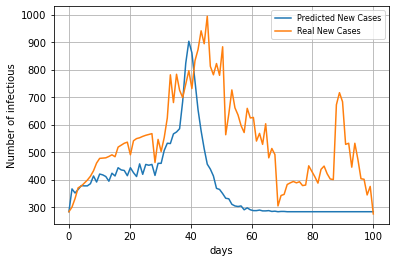

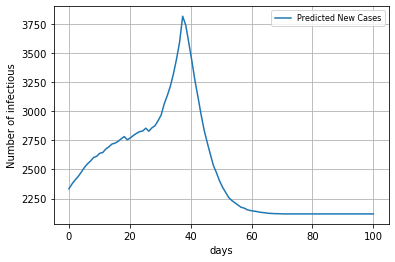

167.69
167.61
211.89584705699164
211.89433687571739


In [ ]:
import math
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from zepid import RiskRatio
import random
import sys

rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  1.8494742  ,  1.74918878  , 1.26467784  , 1.29585476  , 2.77134606 , 2.62436017 ,
  2.63311374  , 2.52348505  , 2.51708237  , 2.60244823 ,  2.3337834 ,  2.34604538 ,
  2.33458541 ,  2.3498725  ,  2.12360502 ,  2.13755926  , 1.98323993  , 1.94868304 ,
  1.95029167  , 1.94317098   ,2.4245713   , 1.69259629 ,  1.83870938  , 1.93870864,
  1.55302453 ,  1.47801861  , 1.53273365 ,  1.77100802  , 1.37349023   ,1.32544061 ,
  1.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
## rr default infection rate values from testing data 49 days
def simu(days =100, nd=100, Rt=rr, mut =4, size=1, limit= 10000, pp=0.001, n0=283):
    kk= atrisk = np.repeat(0,days) ## daily new cases;number of active cases each day
    nn= len(kk)##simulation period
    tt=0 ##the cumulative total number of confirmed cases.
    if(nd > len(Rt)):
          sys.exit('the length of rt should not be smaller than nd')
    stoplimit = limit*(1-pp)
    nk = n0
    for k in range(nk):
        if(tt>stoplimit):
            Rt[1]=0.001
        ni = np.random.poisson(Rt[1]) ##how many people will be infected by this existing virus carrier person.
        a_list=[0,1]
        distribution=[1-pp,pp]
        imuind = random.choices(a_list, distribution)
        if(imuind == 1):
            ni=0
        tt=tt+ni  
        if(ni>0):
            tk=  np.repeat(0,ni)
            for i in range(ni):
                tk[i]= np.random.negative_binomial(1,(size/(size + mut)),size)+1 ##this is the nth day on which a new case occurs
                kk[tk[i]]= kk[tk[i]]+1
            pastevent = [*np.repeat(1,max(tk)-1),*np.repeat(0,(days-max(tk)+1))]
            #pastevent.tolist()
           # np.concatenate((atrisk,pastevent))
            atrisk = atrisk + pastevent
    for j in range(nd):
        nk = kk[j-1] ### this is the number of people newly infected
        if(nk>0):
            for k in range(nk):
                if(tt>stoplimit):
                    Rt[j]=0.001
                ni = np.random.poisson(Rt[j]) ### how many people will be infected by this existing virus carrier person.
                a_list=[0,1]
                distribution=[1-pp,pp]
                imuind = random.choices(a_list, distribution) 
                if(imuind == 1):
                    ni =0
                tt = tt + ni
                if(ni > 0):
                    tk = np.repeat(0,ni)
                    for i in range(ni):
                        tk[i]=np.random.negative_binomial(1,(size/(size + mut)),size)+1+j ### this is the nth day on which a new case occurs
                        kk[tk[i]]=kk[tk[i]]+1
                    pastevent=[*np.repeat(0,(j-1)),*np.repeat(1,(max(tk)+1-j)),*np.repeat(0,(days-max(tk)))]
                   # np.concatenate((atrisk,pastevent))
                    atrisk = atrisk + pastevent
    output={'riskpopu':atrisk,'dailynew':kk,'total':tt}
    return output

rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  2.8494742  ,  2.74918878  , 3.26467784  ,3.29585476  , 3.97134606 , 3.82436017 ,
  3.73311374  , 3.52348505  , 3.51708237  , 3.60244823 ,  3.7337834 ,  3.84604538 ,
  3.33458541 ,  3.9498725  ,  3.12360502 ,  3.13755926  , 3.98323993  , 3.94868304 ,
  2.95029167  , 2.94317098   ,3.4245713   , 3.69259629 ,  3.83870938  , 3.93870864,
  2.55302453 ,  2.47801861  , 2.53273365 ,  2.77100802  , 2.37349023   ,2.32544061 ,
  2.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
real_new_cases=[283, 300, 331, 370, 376, 387, 398, 412, 432, 460, 477, 478, 479, 484, 490, 483, 518, 525, 532, 536, 490, 541,
549, 552, 557, 561, 564, 567, 462, 546, 502, 553, 624, 781, 680, 783, 725, 698, 747, 796, 731, 832, 873, 941, 894, 994, 812
, 781, 822, 779, 883, 563, 638,726, 661, 635, 596, 571, 659,624, 626, 540, 568,528, 603, 479, 513, 491, 304, 342, 346, 382
, 388, 393, 388, 392, 378, 380, 450, 430, 410, 387, 437, 449, 421, 402, 400, 672, 716, 683, 528, 532, 445,532, 473, 403, 401
, 344, 375, 275]
random.seed(25)
for k3 in range(1000):
    out1=simu(nd=100,Rt=rr)
dailyFreq=out1['dailynew']
dailyFreq2=[]
active2=[]
active=out1['riskpopu']
for new in dailyFreq:
    dailyFreq2.append(new+283)
for new2 in active:
    active2.append(new2+2118)
#print(out1)
plt.figure(1)
t = np.linspace(0, 100, 100)
plt.plot(t, dailyFreq2,label='Predicted New Cases')
plt.plot(t, real_new_cases,label='Real New Cases')
plt.xlabel('days')
plt.ylabel('Number of infectious')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()
plt.figure(2)
t = np.linspace(0, 100, 100)
plt.plot(t, active2,label='Predicted New Cases')
plt.xlabel('days')
plt.ylabel('Number of infectious')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()
sum1=0
i=0
for ixx in active:
    sum1=sum1+abs(real_new_cases[i]-dailyFreq2[i])
    i=i+1
print(sum1/len(active))
sum1=0
i=0
for ixx in range(1,100):
    sum1=sum1+abs(real_new_cases[i]-dailyFreq2[i])
    i=i+1
print(sum1/100)
sum1=0
i=0
for ixx in active:
    sum1=sum1+pow((real_new_cases[i]-dailyFreq2[i]),2)
    i=i+1
print(math.sqrt(sum1/len(active)))
sum1=0
i=0
for ixx in range(1,100):
    sum1=sum1+pow((real_new_cases[i]-dailyFreq2[i]),2)
    i=i+1
print(math.sqrt(sum1/100))

In [ ]:
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from zepid import RiskRatio
import random
import sys

rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  1.8494742  ,  1.74918878  , 1.26467784  , 1.29585476  , 2.77134606 , 2.62436017 ,
  2.63311374  , 2.52348505  , 2.51708237  , 2.60244823 ,  2.3337834 ,  2.34604538 ,
  2.33458541 ,  2.3498725  ,  2.12360502 ,  2.13755926  , 1.98323993  , 1.94868304 ,
  1.95029167  , 1.94317098   ,2.4245713   , 1.69259629 ,  1.83870938  , 1.93870864,
  1.55302453 ,  1.47801861  , 1.53273365 ,  1.77100802  , 1.37349023   ,1.32544061 ,
  1.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
## rr default infection rate values from testing data 49 days
def simu(days =100, nd=100, Rt=rr, mut =4, size=1, limit= 10000, pp=0.001, n0=283):
    kk= atrisk = np.repeat(0,days) ## daily new cases;number of active cases each day
    nn= len(kk)##simulation period
    tt=0 ##the cumulative total number of confirmed cases.
    if(nd > len(Rt)):
          sys.exit('the length of rt should not be smaller than nd')
    stoplimit = limit*(1-pp)
    nk = n0
    for k in range(nk):
        if(tt>stoplimit):
            Rt[1]=0.001
        ni = np.random.poisson(Rt[1]) ##how many people will be infected by this existing virus carrier person.
        a_list=[0,1]
        distribution=[1-pp,pp]
        imuind = random.choices(a_list, distribution)
        if(imuind == 1):
            ni=0
        tt=tt+ni  
        if(ni>0):
            tk=  np.repeat(0,ni)
            for i in range(ni):
                tk[i]= np.random.negative_binomial(1,(size/(size + mut)),size)+1 ##this is the nth day on which a new case occurs
                kk[tk[i]]= kk[tk[i]]+1
            pastevent = [*np.repeat(1,max(tk)-1),*np.repeat(0,(days-max(tk)+1))]
            #pastevent.tolist()
           # np.concatenate((atrisk,pastevent))
            atrisk = atrisk + pastevent
    for j in range(nd):
        nk = kk[j-1] ### this is the number of people newly infected
        if(nk>0):
            for k in range(nk):
                if(tt>stoplimit):
                    Rt[j]=0.001
                ni = np.random.poisson(Rt[j]) ### how many people will be infected by this existing virus carrier person.
                a_list=[0,1]
                distribution=[1-pp,pp]
                imuind = random.choices(a_list, distribution) 
                if(imuind == 1):
                    ni =0
                tt = tt + ni
                if(ni > 0):
                    tk = np.repeat(0,ni)
                    for i in range(ni):
                        tk[i]=np.random.negative_binomial(1,(size/(size + mut)),size)+1+j ### this is the nth day on which a new case occurs
                        kk[tk[i]]=kk[tk[i]]+1
                    pastevent=[*np.repeat(0,(j-1)),*np.repeat(1,(max(tk)+1-j)),*np.repeat(0,(days-max(tk)))]
                   # np.concatenate((atrisk,pastevent))
                    atrisk = atrisk + pastevent
    output={'riskpopu':atrisk,'dailynew':kk,'total':tt}
    return output

rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  2.8494742  ,  2.74918878  , 3.26467784  ,3.29585476  , 3.97134606 , 3.82436017 ,
  3.73311374  , 3.52348505  , 3.51708237  , 3.60244823 ,  3.7337834 ,  3.84604538 ,
  3.33458541 ,  3.9498725  ,  3.12360502 ,  3.13755926  , 3.98323993  , 3.94868304 ,
  2.95029167  , 2.94317098   ,3.4245713   , 3.69259629 ,  3.83870938  , 3.93870864,
  2.55302453 ,  2.47801861  , 2.53273365 ,  2.77100802  , 2.37349023   ,2.32544061 ,
  2.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
real_new_cases=[283, 300, 331, 370, 376, 387, 398, 412, 432, 460, 477, 478, 479, 484, 490, 483, 518, 525, 532, 536, 490, 541,
549, 552, 557, 561, 564, 567, 462, 546, 502, 553, 624, 781, 680, 783, 725, 698, 747, 796, 731, 832, 873, 941, 894, 994, 812
, 781, 822, 779, 883, 563, 638,726, 661, 635, 596, 571, 659,624, 626, 540, 568,528, 603, 479, 513, 491, 304, 342, 346, 382
, 388, 393, 388, 392, 378, 380, 450, 430, 410, 387, 437, 449, 421, 402, 400, 672, 716, 683, 528, 532, 445,532, 473, 403, 401
, 344, 375, 275]
random.seed(25)

outMA = newMA = []
gtotalA = []
for k3 in range(1000):
    runi = simu(nd=100,Rt=rr)

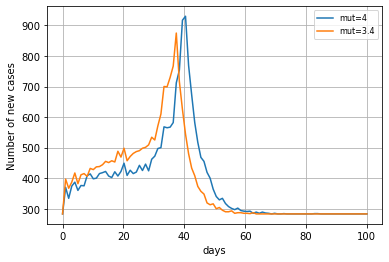

In [ ]:
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from zepid import RiskRatio
import random
import sys
##rr= [*np.repeat(3,30),2,2,1.5,1.5,1.2,1.2,*np.repeat(0.8,4),*np.repeat(0.5,10),*np.repeat(0.1,50)]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  1.8494742  ,  1.74918878  , 1.26467784  , 1.29585476  , 2.77134606 , 2.62436017 ,
  2.63311374  , 2.52348505  , 2.51708237  , 2.60244823 ,  2.3337834 ,  2.34604538 ,
  2.33458541 ,  2.3498725  ,  2.12360502 ,  2.13755926  , 1.98323993  , 1.94868304 ,
  1.95029167  , 1.94317098   ,2.4245713   , 1.69259629 ,  1.83870938  , 1.93870864,
  1.55302453 ,  1.47801861  , 1.53273365 ,  1.77100802  , 1.37349023   ,1.32544061 ,
  1.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
## rr default infection rate values from testing data 49 days
def simu(days =100, nd=100, Rt=rr, mut =4, size=1, limit= 10000, pp=0.001, n0=283):
    kk= atrisk = np.repeat(0,days) ## daily new cases;number of active cases each day
    nn= len(kk)##simulation period
    tt=0 ##the cumulative total number of confirmed cases.
    if(nd > len(Rt)):
          sys.exit('the length of rt should not be smaller than nd')
    stoplimit = limit*(1-pp)
    nk = n0
    for k in range(nk):
        if(tt>stoplimit):
            Rt[1]=0.001
        ni = np.random.poisson(Rt[1]) ##how many people will be infected by this existing virus carrier person.
        a_list=[0,1]
        distribution=[1-pp,pp]
        imuind = random.choices(a_list, distribution)
        if(imuind == 1):
            ni=0
        tt=tt+ni  
        if(ni>0):
            tk=  np.repeat(0,ni)
            for i in range(ni):
                tk[i]= np.random.negative_binomial(1,(size/(size + mut)),size)+1 ##this is the nth day on which a new case occurs
                kk[tk[i]]= kk[tk[i]]+1
            pastevent = [*np.repeat(1,max(tk)-1),*np.repeat(0,(days-max(tk)+1))]
            #pastevent.tolist()
           # np.concatenate((atrisk,pastevent))
            atrisk = atrisk + pastevent
    for j in range(nd):
        nk = kk[j-1] ### this is the number of people newly infected
        if(nk>0):
            for k in range(nk):
                if(tt>stoplimit):
                    Rt[j]=0.001
                ni = np.random.poisson(Rt[j]) ### how many people will be infected by this existing virus carrier person.
                a_list=[0,1]
                distribution=[1-pp,pp]
                imuind = random.choices(a_list, distribution) 
                if(imuind == 1):
                    ni =0
                tt = tt + ni
                if(ni > 0):
                    tk = np.repeat(0,ni)
                    for i in range(ni):
                        tk[i]=np.random.negative_binomial(1,(size/(size + mut)),size)+1+j ### this is the nth day on which a new case occurs
                        kk[tk[i]]=kk[tk[i]]+1
                    pastevent=[*np.repeat(0,(j-1)),*np.repeat(1,(max(tk)+1-j)),*np.repeat(0,(days-max(tk)))]
                   # np.concatenate((atrisk,pastevent))
                    atrisk = atrisk + pastevent
    output={'riskpopu':atrisk,'dailynew':kk,'total':tt}
    return output
#simu(nd=50)
#rr= [*np.repeat(3,30),2,2,1.5,1.5,1.2,1.2,*np.repeat(0.8,4),*np.repeat(0.5,10),*np.repeat(0.1,50)]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  2.8494742  ,  2.74918878  , 3.26467784  ,3.29585476  , 3.97134606 , 3.82436017 ,
  3.73311374  , 3.52348505  , 3.51708237  , 3.60244823 ,  3.7337834 ,  3.84604538 ,
  3.33458541 ,  3.9498725  ,  3.12360502 ,  3.13755926  , 3.98323993  , 3.94868304 ,
  2.95029167  , 2.94317098   ,3.4245713   , 3.69259629 ,  3.83870938  , 3.93870864,
  2.55302453 ,  2.47801861  , 2.53273365 ,  2.77100802  , 2.37349023   ,2.32544061 ,
  2.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
real_new_cases=[283, 300, 331, 370, 376, 387, 398, 412, 432, 460, 477, 478, 479, 484, 490, 483, 518, 525, 532, 536, 490, 541,
549, 552, 557, 561, 564, 567, 462, 546, 502, 553, 624, 781, 680, 783, 725, 698, 747, 796, 731, 832, 873, 941, 894, 994, 812
, 781, 822, 779, 883, 563, 638,726, 661, 635, 596, 571, 659,624, 626, 540, 568,528, 603, 479, 513, 491, 304, 342, 346, 382
, 388, 393, 388, 392, 378, 380, 450, 430, 410, 387, 437, 449, 421, 402, 400, 672, 716, 683, 528, 532, 445,532, 473, 403, 401
, 344, 375, 275]
random.seed(25)
for k3 in range(1000):
    out1=simu(nd=100,Rt=rr)
dailyFreq=out1['dailynew']
dailyFreq2=[]
for new in dailyFreq:
    dailyFreq2.append(new+283)
for k3 in range(1000):
    out2=simu(nd=100,Rt=rr, mut=3.4)
dailyFreq3=out2['dailynew']
dailyFreq4=[]
for new2 in dailyFreq3:
    dailyFreq4.append(new2+283)
#print(out1)
plt.figure(1)
t = np.linspace(0, 100, 100)
plt.plot(t, dailyFreq2,label='mut=4')
plt.plot(t, dailyFreq4,label='mut=3.4')
plt.xlabel('days')
plt.ylabel('Number of new cases')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()


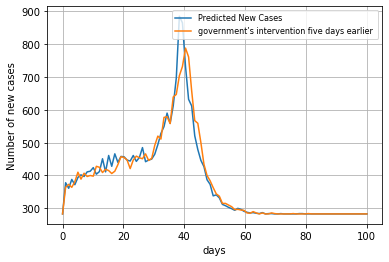

In [ ]:
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from zepid import RiskRatio
import random
import sys
##rr= [*np.repeat(3,30),2,2,1.5,1.5,1.2,1.2,*np.repeat(0.8,4),*np.repeat(0.5,10),*np.repeat(0.1,50)]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  1.8494742  ,  1.74918878  , 1.26467784  , 1.29585476  , 2.77134606 , 2.62436017 ,
  2.63311374  , 2.52348505  , 2.51708237  , 2.60244823 ,  2.3337834 ,  2.34604538 ,
  2.33458541 ,  2.3498725  ,  2.12360502 ,  2.13755926  , 1.98323993  , 1.94868304 ,
  1.95029167  , 1.94317098   ,2.4245713   , 1.69259629 ,  1.83870938  , 1.93870864,
  1.55302453 ,  1.47801861  , 1.53273365 ,  1.77100802  , 1.37349023   ,1.32544061 ,
  1.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
## rr default infection rate values from testing data 49 days
def simu(days =100, nd=100, Rt=rr, mut =4, size=1, limit= 10000, pp=0.001, n0=283):
    kk= atrisk = np.repeat(0,days) ## daily new cases;number of active cases each day
    nn= len(kk)##simulation period
    tt=0 ##the cumulative total number of confirmed cases.
    if(nd > len(Rt)):
          sys.exit('the length of rt should not be smaller than nd')
    stoplimit = limit*(1-pp)
    nk = n0
    for k in range(nk):
        if(tt>stoplimit):
            Rt[1]=0.001
        ni = np.random.poisson(Rt[1]) ##how many people will be infected by this existing virus carrier person.
        a_list=[0,1]
        distribution=[1-pp,pp]
        imuind = random.choices(a_list, distribution)
        if(imuind == 1):
            ni=0
        tt=tt+ni  
        if(ni>0):
            tk=  np.repeat(0,ni)
            for i in range(ni):
                tk[i]= np.random.negative_binomial(1,(size/(size + mut)),size)+1 ##this is the nth day on which a new case occurs
                kk[tk[i]]= kk[tk[i]]+1
            pastevent = [*np.repeat(1,max(tk)-1),*np.repeat(0,(days-max(tk)+1))]
            #pastevent.tolist()
           # np.concatenate((atrisk,pastevent))
            atrisk = atrisk + pastevent
    for j in range(nd):
        nk = kk[j-1] ### this is the number of people newly infected
        if(nk>0):
            for k in range(nk):
                if(tt>stoplimit):
                    Rt[j]=0.001
                ni = np.random.poisson(Rt[j]) ### how many people will be infected by this existing virus carrier person.
                a_list=[0,1]
                distribution=[1-pp,pp]
                imuind = random.choices(a_list, distribution) 
                if(imuind == 1):
                    ni =0
                tt = tt + ni
                if(ni > 0):
                    tk = np.repeat(0,ni)
                    for i in range(ni):
                        tk[i]=np.random.negative_binomial(1,(size/(size + mut)),size)+1+j ### this is the nth day on which a new case occurs
                        kk[tk[i]]=kk[tk[i]]+1
                    pastevent=[*np.repeat(0,(j-1)),*np.repeat(1,(max(tk)+1-j)),*np.repeat(0,(days-max(tk)))]
                   # np.concatenate((atrisk,pastevent))
                    atrisk = atrisk + pastevent
    output={'riskpopu':atrisk,'dailynew':kk,'total':tt}
    return output
#simu(nd=50)
#rr= [*np.repeat(3,30),2,2,1.5,1.5,1.2,1.2,*np.repeat(0.8,4),*np.repeat(0.5,10),*np.repeat(0.1,50)]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,1.648716953 ,1.648716953 ,
     1.648716953 ,1.648716953 ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
real_new_cases=[283, 300, 331, 370, 376, 387, 398, 412, 432, 460, 477, 478, 479, 484, 490, 483, 518, 525, 532, 536, 490, 541,
549, 552, 557, 561, 564, 567, 462, 546, 502, 553, 624, 781, 680, 783, 725, 698, 747, 796, 731, 832, 873, 941, 894, 994, 812
, 781, 822, 779, 883, 563, 638,726, 661, 635, 596, 571, 659,624, 626, 540, 568,528, 603, 479, 513, 491, 304, 342, 346, 382
, 388, 393, 388, 392, 378, 380, 450, 430, 410, 387, 437, 449, 421, 402, 400, 672, 716, 683, 528, 532, 445,532, 473, 403, 401
, 344, 375, 275]
random.seed(25)
for k3 in range(1000):
    out1=simu(nd=100,Rt=rr)
dailyFreq=out1['dailynew']
dailyFreq2=[]
for new in dailyFreq:
    dailyFreq2.append(new+283)
for k3 in range(1000):
    out2=simu(nd=100,Rt=rs)
dailyFreq3=out2['dailynew']
dailyFreq4=[]
for new2 in dailyFreq3:
    dailyFreq4.append(new2+283)
#print(out1)
plt.figure(1)
t = np.linspace(0, 100, 100)
plt.plot(t, dailyFreq2,label='Predicted New Cases')
plt.plot(t, dailyFreq4,label='government’s intervention five days earlier ')
plt.xlabel('days')
plt.ylabel('Number of new cases')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()

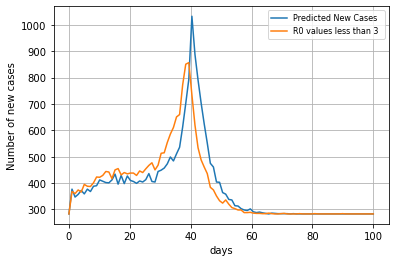

In [ ]:
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from zepid import RiskRatio
import random
import sys
##rr= [*np.repeat(3,30),2,2,1.5,1.5,1.2,1.2,*np.repeat(0.8,4),*np.repeat(0.5,10),*np.repeat(0.1,50)]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
  1.8494742  ,  1.74918878  , 1.26467784  , 1.29585476  , 2.77134606 , 2.62436017 ,
  2.63311374  , 2.52348505  , 2.51708237  , 2.60244823 ,  2.3337834 ,  2.34604538 ,
  2.33458541 ,  2.3498725  ,  2.12360502 ,  2.13755926  , 1.98323993  , 1.94868304 ,
  1.95029167  , 1.94317098   ,2.4245713   , 1.69259629 ,  1.83870938  , 1.93870864,
  1.55302453 ,  1.47801861  , 1.53273365 ,  1.77100802  , 1.37349023   ,1.32544061 ,
  1.36223616   ,1.50765843  , 1.423495   ,  2.02653993  , 1.11252427  , 0.94206858 ,
  0.97230465,0.77230465,0.67230465,0.57230465,0.77230465,0.77230465,0.87230465,0.97230465,0.67230465,0.87230465,
    1.85029167  , 1.44317098   ,1.3245713   , 1.19259629 ,  1.33870938  , 1.43870864,
  0.95302453 ,  0.87801861  , 0.93273365 ,  0.97100802  , 0.97349023   ,0.92544061 ,
  0.96223616   ,0.90765843  , 0.923495   ,  0.92653993  , 0.91252427  , 0.94206858]
## rr default infection rate values from testing data 49 days
def simu(days =100, nd=100, Rt=rr, mut =4, size=1, limit= 10000, pp=0.001, n0=283):
    kk= atrisk = np.repeat(0,days) ## daily new cases;number of active cases each day
    nn= len(kk)##simulation period
    tt=0 ##the cumulative total number of confirmed cases.
    if(nd > len(Rt)):
          sys.exit('the length of rt should not be smaller than nd')
    stoplimit = limit*(1-pp)
    nk = n0
    for k in range(nk):
        if(tt>stoplimit):
            Rt[1]=0.001
        ni = np.random.poisson(Rt[1]) ##how many people will be infected by this existing virus carrier person.
        a_list=[0,1]
        distribution=[1-pp,pp]
        imuind = random.choices(a_list, distribution)
        if(imuind == 1):
            ni=0
        tt=tt+ni  
        if(ni>0):
            tk=  np.repeat(0,ni)
            for i in range(ni):
                tk[i]= np.random.negative_binomial(1,(size/(size + mut)),size)+1 ##this is the nth day on which a new case occurs
                kk[tk[i]]= kk[tk[i]]+1
            pastevent = [*np.repeat(1,max(tk)-1),*np.repeat(0,(days-max(tk)+1))]
            #pastevent.tolist()
           # np.concatenate((atrisk,pastevent))
            atrisk = atrisk + pastevent
    for j in range(nd):
        nk = kk[j-1] ### this is the number of people newly infected
        if(nk>0):
            for k in range(nk):
                if(tt>stoplimit):
                    Rt[j]=0.001
                ni = np.random.poisson(Rt[j]) ### how many people will be infected by this existing virus carrier person.
                a_list=[0,1]
                distribution=[1-pp,pp]
                imuind = random.choices(a_list, distribution) 
                if(imuind == 1):
                    ni =0
                tt = tt + ni
                if(ni > 0):
                    tk = np.repeat(0,ni)
                    for i in range(ni):
                        tk[i]=np.random.negative_binomial(1,(size/(size + mut)),size)+1+j ### this is the nth day on which a new case occurs
                        kk[tk[i]]=kk[tk[i]]+1
                    pastevent=[*np.repeat(0,(j-1)),*np.repeat(1,(max(tk)+1-j)),*np.repeat(0,(days-max(tk)))]
                   # np.concatenate((atrisk,pastevent))
                    atrisk = atrisk + pastevent
    output={'riskpopu':atrisk,'dailynew':kk,'total':tt}
    return output
#simu(nd=50)
#rr= [*np.repeat(3,30),2,2,1.5,1.5,1.2,1.2,*np.repeat(0.8,4),*np.repeat(0.5,10),*np.repeat(0.1,50)]
rs= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 2.38851776, 2.45791598, 2.23941893, 2.71095331, 2.23971344,
 2.11153959, 2.01806934, 1.3286167  ,2.05203058, 2.73365883 ,2.03936064,
 2.3782682 , 2.28934013, 2.27285216 ,2.93924556 ,2.3575437 , 2.1011028,
 1.61821651 ,2.78290627 ,2.31750379, 2.38844919 ,2.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
rr= [1.51603777,  1.58915014 , 1.5172137  ,  1.43652708 ,  1.42620368   ,1.42134656 ,
  1.30180606 , 1.36855659 , 1.20467452 , 1.26651909 ,  1.11630589 ,  1.19563867 ,
  1.14421587 ,  1.1424925 ,  1.16654541  , 1.12868042 ,   1.11192779  , 1.12578079 ,
  1.16759908 ,  1.19710149 ,  0.50588418  , 1.17862692 ,  1.182162373   ,1.149182415 ,
  1.16699347  , 1.10107983 ,  1.13224066  , 0.56612625  , 1.66126522  , 1.62295483 ,
  1.67871711  , 1.65088355  , 1.87984991  , 1.60329886   ,1.169747347   ,1.648716953 ,
     2.62187523, 3.38851776, 2.45791598, 4.23941893, 3.71095331, 6.23971344,
 5.11153959, 4.01806934, 3.3286167  ,4.05203058, 5.73365883 ,5.03936064,
 5.3782682 , 4.28934013, 4.27285216 ,4.93924556 ,4.3575437 , 5.1011028,
 3.61821651 ,4.78290627 ,4.31750379, 4.38844919 ,4.90537505 ,2.97589148,
 2.83180436 ,2.37764011 ,2.25308109, 2.00695798, 1.34996158, 1.33324555,
 1.20988724, 1.18478068, 1.29594286 ,1.53408864 ,1.65850837 ,1.32366534,
 1.31109618, 0.81446993, 0.70861988, 0.79171374 ,0.854929 ,  0.87321861,
 1.09110613, 1.24611213 ,1.26004031 ,1.88973308, 1.90920594, 2.1906703,
 1.69084937 ,1.46544721, 1.62538031, 1.57441959, 1.54760324, 1.37702881,
 1.40401005 ,0.89599598 ,0.89665082, 0.76048683 ,1.00017377 ,1.0134217,
 0.52349135, 0.45810737, 0.57362108,0.53887555]
real_new_cases=[283, 300, 331, 370, 376, 387, 398, 412, 432, 460, 477, 478, 479, 484, 490, 483, 518, 525, 532, 536, 490, 541,
549, 552, 557, 561, 564, 567, 462, 546, 502, 553, 624, 781, 680, 783, 725, 698, 747, 796, 731, 832, 873, 941, 894, 994, 812
, 781, 822, 779, 883, 563, 638,726, 661, 635, 596, 571, 659,624, 626, 540, 568,528, 603, 479, 513, 491, 304, 342, 346, 382
, 388, 393, 388, 392, 378, 380, 450, 430, 410, 387, 437, 449, 421, 402, 400, 672, 716, 683, 528, 532, 445,532, 473, 403, 401
, 344, 375, 275]
random.seed(25)
for k3 in range(1000):
    out1=simu(nd=100,Rt=rr)
dailyFreq=out1['dailynew']
dailyFreq2=[]
for new in dailyFreq:
    dailyFreq2.append(new+283)
for k3 in range(1000):
    out2=simu(nd=100,Rt=rs)
dailyFreq3=out2['dailynew']
dailyFreq4=[]
for new2 in dailyFreq3:
    dailyFreq4.append(new2+283)
#print(out1)
plt.figure(1)
t = np.linspace(0, 100, 100)
plt.plot(t, dailyFreq2,label='Predicted New Cases')
plt.plot(t, dailyFreq4,label='R0 values less than 3 ')
plt.xlabel('days')
plt.ylabel('Number of new cases')
plt.grid()
plt.legend(loc='upper right', prop={'size': 8})
plt.show()